In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()
import chart_studio as cs
from IPython.display import display, HTML
import seaborn as sns
import yfinance as yf
from datetime import datetime, date
%matplotlib inline

In [2]:
date_today = datetime.now()
days = pd.date_range("1984-01-01",date_today , freq='D')
prova = pd.DataFrame({'Data': days})
prova = prova.set_index('Data')
prova.index = prova.index.date
assets=['T', 'WMB', 'IRM', 'MO', 'PM','D','PGR','GIL','IBM','VZ', 'PPL', 'K','DUK', 'PFE','PSA',
       'IP', 'SO','KMI','XOM','WMT']
for a in range(len(assets)):
    
    stock = yf.Ticker(assets[a])
    prova[assets[a]]=stock.dividends

prova = prova.dropna(how='all') #cancella le righe che sono tute nan
print(prova)
        

                  T      WMB     IRM       MO    PM       D  PGR    GIL  \
1984-01-26      NaN      NaN     NaN      NaN   NaN     NaN  NaN    NaN   
1984-01-31      NaN      NaN     NaN      NaN   NaN     NaN  NaN    NaN   
1984-02-03      NaN      NaN     NaN      NaN   NaN     NaN  NaN    NaN   
1984-02-06      NaN      NaN     NaN      NaN   NaN     NaN  NaN    NaN   
1984-02-10      NaN      NaN     NaN      NaN   NaN     NaN  NaN    NaN   
1984-02-21      NaN      NaN     NaN      NaN   NaN     NaN  NaN    NaN   
1984-02-29      NaN  0.03742     NaN      NaN   NaN     NaN  NaN    NaN   
1984-03-09      NaN      NaN     NaN  0.03542   NaN     NaN  NaN    NaN   
1984-03-19      NaN      NaN     NaN      NaN   NaN     NaN  NaN    NaN   
1984-03-26  0.11667      NaN     NaN      NaN   NaN     NaN  NaN    NaN   
1984-05-01      NaN      NaN     NaN      NaN   NaN     NaN  NaN    NaN   
1984-05-04      NaN      NaN     NaN      NaN   NaN     NaN  NaN    NaN   
1984-05-08      NaN      

In [3]:
df = pd.DataFrame(data = prova)
df.info()
df.head()
#annuale = pd.DataFrame(df['Dividends'].resample('Y').sum())


<class 'pandas.core.frame.DataFrame'>
Index: 1836 entries, 1984-01-26 to 2020-04-09
Data columns (total 20 columns):
T      146 non-null float64
WMB    149 non-null float64
IRM    45 non-null float64
MO     148 non-null float64
PM     50 non-null float64
D      146 non-null float64
PGR    108 non-null float64
GIL    38 non-null float64
IBM    147 non-null float64
VZ     147 non-null float64
PPL    143 non-null float64
K      143 non-null float64
DUK    147 non-null float64
PFE    146 non-null float64
PSA    144 non-null float64
IP     146 non-null float64
SO     146 non-null float64
KMI    38 non-null float64
XOM    147 non-null float64
WMT    145 non-null float64
dtypes: float64(20)
memory usage: 301.2+ KB


,T,WMB,IRM,MO,PM,D,PGR,GIL,IBM,VZ,PPL,K,DUK,PFE,PSA,IP,SO,KMI,XOM,WMT
1984-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01375,NaN,NaN,NaN,NaN,NaN,NaN
1984-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13745,NaN,NaN,NaN
1984-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN
1984-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25714,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0.24 vuol dire che mi danno 24cent ad azione

Devo calcolare il numero di azioni che possiedo in base al capitale

In [4]:
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a]= wb.DataReader(a,data_source='yahoo', start ='2015-01-01' , end='2017-1-1')['Adj Close']
pf_data.head()

,T,WMB,IRM,MO,PM,D,PGR,GIL,IBM,VZ,PPL,K,DUK,PFE,PSA,IP,SO,KMI,XOM,WMT
Date,,,,,,,,,,,,,,,,,,,,
2015-01-02,25.006248,32.873245,27.509871,37.854733,61.924892,62.313286,23.516497,25.937689,129.241516,36.646832,26.210531,55.340336,66.278664,25.901522,155.637985,43.278141,38.225479,34.726021,75.439079,75.466400
2015-01-05,24.769997,31.571966,27.644022,37.638290,61.458679,61.557400,23.255587,25.265129,127.207932,36.342476,25.605003,54.309258,65.324501,25.760977,156.369522,42.595318,38.062885,33.785069,73.374931,75.246773
2015-01-06,24.806910,31.143061,27.898218,37.862465,61.986027,61.243778,22.968586,24.991465,124.464600,36.709263,25.597795,54.469830,66.396927,25.975924,159.037888,42.018166,38.519703,33.119915,72.984848,75.826607
2015-01-07,24.836861,30.975866,27.940586,38.558186,62.452290,61.493065,23.446917,25.367174,123.651100,36.472370,25.713137,55.788273,66.609871,26.331417,162.296448,41.945000,38.945545,33.557941,73.724373,77.838448
2015-01-08,25.083960,31.273922,28.456047,39.207520,63.392395,62.216793,23.916552,26.164972,126.338654,37.254089,25.612217,56.802448,66.877975,26.868792,164.507629,43.383816,38.976513,34.344784,74.951500,79.481316


In [5]:
capitale = 100
#azioni = capitale/prezzo di acquisto
value = (pf_data.values[0])# è un array 
azioni = capitale/value
azioni


array([3.99900049, 3.04198747, 3.63505891, 2.64167763, 1.61485949,
       1.60479421, 4.25233407, 3.85539362, 0.77374518, 2.72874887,
       3.81526033, 1.80700024, 1.50878118, 3.86077703, 0.64251667,
       2.31063529, 2.61605616, 2.87968496, 1.32557291, 1.32509302])

In [6]:
#elimino tutti i dividendi che stavano prima dell'acquisto che coincide con start del wb.datareader
start = '2015-01-01' 
datetime_object = datetime.strptime(start, '%Y-%m-%d')
start = datetime_object.date()
datetime_object
start

datetime.date(2015, 1, 1)

In [7]:
mask = (prova.index > start)
prova = prova.loc[mask]
soldi = prova*azioni
soldi.fillna(0, inplace=True) # trasmormo Nan in 0
soldi
bho = soldi.to_numpy().sum(axis = 0)
bho

array([43.34916535, 26.19151209, 42.15396066, 37.45898877, 38.23987265,
       26.27930751, 27.18899882,  8.53584147, 25.81213917, 35.02349172,
       31.68764466, 20.18419265, 29.02894981, 26.17606828, 25.57216347,
       22.49518988, 33.11927094, 14.34083112, 21.8056744 , 14.23149902])

Valuto quale è la miglior 

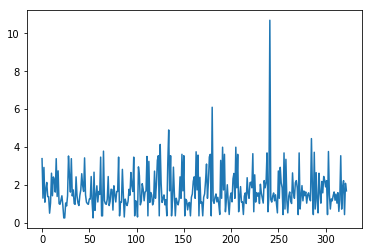

In [8]:
bho2 = soldi.to_numpy().sum(axis = 1)
plt.plot(bho2)